In [1]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


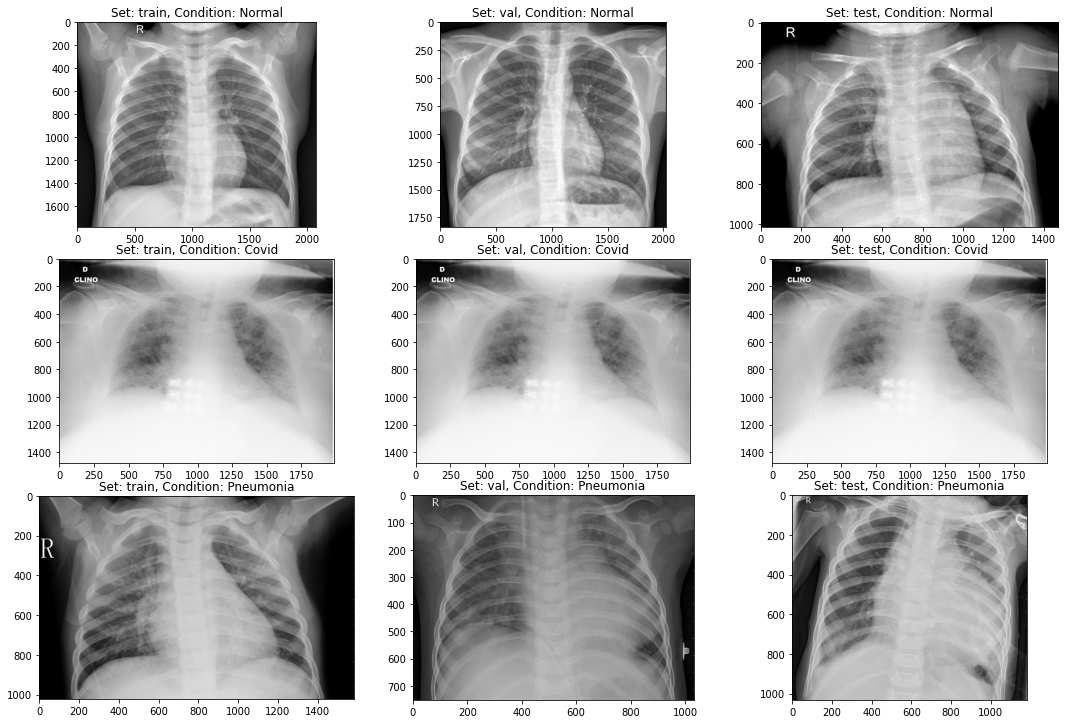

In [3]:
input_path = '/content/drive/My Drive/COVID-19_Dataset/data/'

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))

    ax[i+3].imshow(plt.imread(set_path+'/COVID/'+os.listdir(set_path+'/COVID')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Covid'.format(_set))
    
    ax[i+6].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+6].set_title('Set: {}, Condition: Pneumonia'.format(_set))
   

In [4]:
# Distribution of our datasets
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_covid = len(os.listdir(input_path + _set + '/COVID'))
    n_pneumonia = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    print('Set: {}, normal images: {}, Covid images: {}, Pneumonia images: {}'.format(_set, n_normal, n_covid,n_pneumonia))

Set: train, normal images: 1259, Covid images: 304, Pneumonia images: 4261
Set: val, normal images: 232, Covid images: 304, Pneumonia images: 390
Set: test, normal images: 1259, Covid images: 304, Pneumonia images: 390


In [5]:
input_path = '/content/drive/My Drive/COVID-19_Dataset/data/'
img_dims=150
train_data=[]
train_labels=[]
for cond in ['/COVID/', '/NORMAL/','/PNEUMONIA']:
    for img in (os.listdir(input_path + 'train' + cond)):
        if cond=='/NORMAL/':
            label = 0
        elif cond=='/COVID/':
            label = 1
        elif cond=='/PNEUMONIA':
            label = 2
        img = cv2.imread(input_path+'train'+cond+img)
        #img = cv2.resize(img, (img_dims, img_dims))
        try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
        except:
         break
        img = img.astype('float32') / 255
        train_data.append(np.array(img))      
        train_labels.append(np.array(label))

In [6]:
test_data = []
test_labels = []

for cond in ['/NORMAL/', '/COVID/','/PNEUMONIA']:
    for img in (os.listdir(input_path + 'test' + cond)):
      if cond=='/NORMAL/':
          label = 0
      elif cond=='/COVID/':
          label = 1
      elif cond== '/PNEUMONIA':
          label = 2
      img = cv2.imread(input_path+'test'+cond+img)
     # img = cv2.resize(img, (img_dims, img_dims))
      try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
      except:
        break
        #img = np.dstack([img, img, img])
      img = img.astype('float32') / 255
        
      test_data.append(np.array(img))
      test_labels.append(np.array(label))
        
test_data = (np.array(test_data))
test_labels = (np.array(test_labels))
a=np.array(test_data)
a.shape

(1563, 150, 150, 3)

In [7]:
val_data = []
val_labels = []

for cond in ['/NORMAL/', '/COVID/','/PNEUMONIA']:
    for img in (os.listdir(input_path + 'val' + cond)):
      if cond=='/NORMAL/':
          label = 0
      elif cond=='/COVID/':
          label = 1
      elif cond== '/PNEUMONIA':
          label = 2
      img = cv2.imread(input_path+'val'+cond+img)
     # img = cv2.resize(img, (img_dims, img_dims))
      try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
      except:
        break
        #img = np.dstack([img, img, img])
      img = img.astype('float32') / 255
        
      val_data.append(np.array(img))
      val_labels.append(np.array(label))
        
val_data = (np.array(val_data))
val_labels = (np.array(val_labels))
c=np.array(val_data)
c.shape

(535, 150, 150, 3)

In [8]:
a=np.array(test_data)
a1=np.array(test_labels)
b=np.array(train_data)
b1=np.array(train_labels)
c=np.array(val_data)
c1=np.array(val_labels)
print(b.shape)
print(a.shape)
print(a1.shape)
print(b1.shape)
print(c.shape)
print(c1.shape)

(1563, 150, 150, 3)
(1563, 150, 150, 3)
(1563,)
(1563,)
(535, 150, 150, 3)
(535,)


In [9]:
d=np.concatenate((a, b,c))
d_l=np.hstack((a1,b1,c1))
d.shape

(3661, 150, 150, 3)

In [10]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

In [11]:
model = VGG19(weights='imagenet', include_top=False)
VGG19FeatureList = []

80150528/80134624 [==============================] - 1s 0us/step


In [12]:
VGG19FeatureList = []
X = d
Y=np.array(d_l)
for i in range(X.shape[0]):
  I=X[i,:,:,:]
  I=np.expand_dims(I, axis=0)
  VGG19Feature = model.predict(I)
  VGG19FeatureNp = np.array(VGG19Feature)
  VGG19FeatureList.append(VGG19FeatureNp.flatten())

In [19]:
XX = np.array(VGG19FeatureList)
print(XX.shape)
print(Y.shape)  


(3661, 8192)
(3661,)


In [18]:
# SVM Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
x_train,x_test,y_train,y_test=train_test_split(XX,Y,random_state=0)#changed from 42 to 0
# the model
classifier_svc=SVC(kernel='linear', C=0.01,random_state=0)#changing the value of c, the accuracy improved.
# fit the model using the training set
classifier_svc.fit(x_train,y_train)
#Accuracy score
accuracy=classifier_svc.score(x_test,y_test)
print(accuracy)


1.0


[[681   0]
 [  0 235]]

TEST METRICS ----------------------
Accuracy: 1.0%
Precision: [50. nan nan 50.]%
Recall: [50. nan nan 50.]%
F1-score: [50. nan nan 50.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


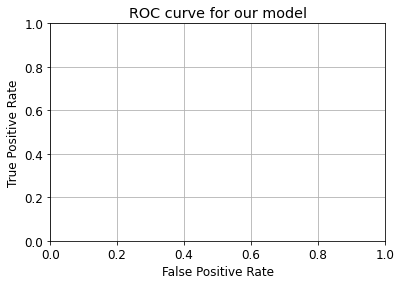

In [20]:
from pyparsing.core import trace_parse_action
from traitlets.traitlets import Any
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(x_test)
# build the confusion matrix
print("==============================================================")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("===============================================================")
#from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
##########################################################_HERE
tn = cnf_matrix.ravel()
fp=cnf_matrix.ravel()
fn=cnf_matrix.ravel()
tp=cnf_matrix.ravel()
print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(accuracy))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
XGBClassifier: Any(
    n_jobs = 1,
    objective = 'multi:softmax',
    silent=1,
    tree_method='approx'
)
thresholds=np.true_divide(y_test, y_pred)
tpr=np.true_divide(y_test, y_pred)
fpr=np.true_divide(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


Confusion Matrix without Normalization


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix with Normalized Values


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


([<matplotlib.axis.YTick at 0x7f9dd5001550>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'covid'), Text(0, 0, 'PNEUMONIA')])

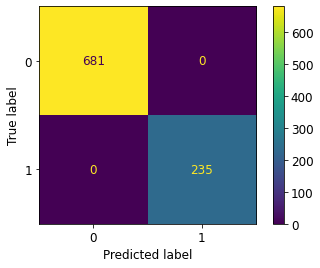

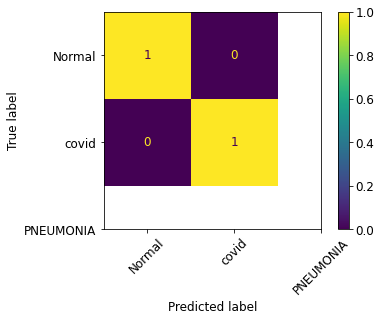

In [21]:
#Plot Confusion Matrix
classes = ['Normal','covid','PNEUMONIA']
print('Confusion Matrix without Normalization')
plot_confusion_matrix(classifier_svc, x_test, y_test,normalize=None)  
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(classifier_svc, x_test, y_test,normalize='true')
tick_marks = [0,1,2]
plt.xticks(tick_marks, classes,rotation=45)
plt.yticks(tick_marks, classes)


Confusion Matrix without Normalization


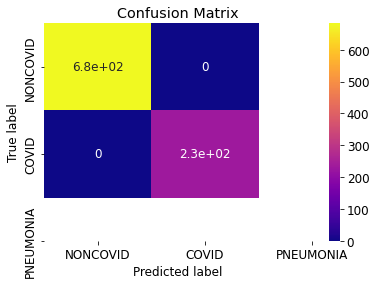

Confusion Matrix with Normalized Values


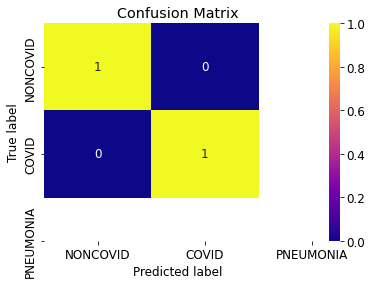

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['NONCOVID','COVID','PNEUMONIA']
  tick_marks = [0.5,1.5,2.5]
  cn = confusion_matrix(y_test, y_pred,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


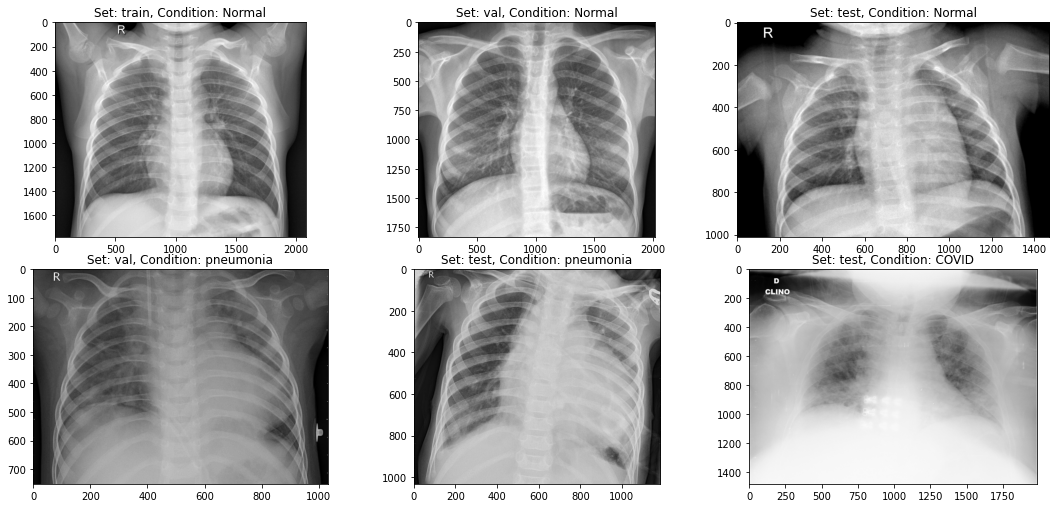

In [ ]:
input_path = '/content/drive/My Drive/COVID-19_Dataset/data/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))

    ax[i+2].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: pneumonia'.format(_set))

    ax[i+3].imshow(plt.imread(set_path+'/COVID/'+os.listdir(set_path+'/COVID')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: COVID'.format(_set))

In [ ]:
# Distribution of our datasets
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_pneumonia = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    n_covid = len(os.listdir(input_path + _set +'/COVID'))
    print('Set: {}, normal images: {}, pneumonia images: {},covid images: {}'.format(_set, n_normal, n_pneumonia,n_covid))

Set: train, normal images: 1259, pneumonia images: 4261,covid images: 304
Set: val, normal images: 232, pneumonia images: 390,covid images: 304
Set: test, normal images: 1259, pneumonia images: 390,covid images: 304


In [ ]:
input_path = '/content/drive/My Drive/COVID-19_Dataset/data/'
img_dims=150
train_data=[]
train_labels=[]
for cond in ['/PNEUMONIA/', '/NORMAL/','/COVID/']:
    for img in (os.listdir(input_path + 'train' + cond)):
        if cond=='/NORMAL/':
            label = 0
        elif cond=='/PNEUMONIA/':
            label = 1
        elif cond=='/COVID/':
            label = 2
        img = cv2.imread(input_path+'train'+cond+img)
        #img = cv2.resize(img, (img_dims, img_dims))
        try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
        except:
         break
        img = img.astype('float32') / 255
        
        train_data.append(np.array(img))      
        train_labels.append(np.array(label))

In [ ]:
test_data = []
test_labels = []

for cond in ['/NORMAL/', '/PNEUMONIA/','/COVID/']:
    for img in (os.listdir(input_path + 'test' + cond)):
      if cond=='/NORMAL/':
          label = 0
      elif cond=='/PNEUMONIA/':
          label = 1
      elif cond=='/COVID/':
          label = 2
      img = cv2.imread(input_path+'test'+cond+img)
     # img = cv2.resize(img, (img_dims, img_dims))
      try:
           img = cv2.resize(img, (img_dims,img_dims), interpolation=cv2.INTER_AREA)
            #print(img.shape)
      except:
        break
        #img = np.dstack([img, img, img])
      img = img.astype('float32') / 255
        
      test_data.append(np.array(img))
      test_labels.append(np.array(label))
        
test_data = (np.array(test_data))
test_labels = (np.array(test_labels))
a=np.array(test_data)
a.shape

(1953, 150, 150, 3)

In [ ]:
a=np.array(test_data)
a1=np.array(test_labels)
b=np.array(train_data)
b1=np.array(train_labels)
print(b.shape)
print(a.shape)
print(a1.shape)
print(b1.shape)


(5824, 150, 150, 3)
(1953, 150, 150, 3)
(1953,)
(5824,)


In [ ]:
c=np.concatenate((a, b))
c_l=np.hstack((a1,b1))
c.shape

(7777, 150, 150, 3)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
VGG16FeatureList = []

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
VGG16FeatureList = []
X = c
Y=np.array(c_l)
for i in range(X.shape[0]):
  I=X[i,:,:,:]
  I=np.expand_dims(I, axis=0)
  VGG16Feature = model.predict(I)
  VGG16FeatureNp = np.array(VGG16Feature)
  VGG16FeatureList.append(VGG16FeatureNp.flatten())

In [ ]:
XX = np.array(VGG16FeatureList)
print(XX.shape)
print(Y.shape)  


(7777, 8192)
(7777,)


In [ ]:
# SVM Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
x_train,x_test,y_train,y_test=train_test_split(XX,Y,random_state=0)#changed from 42 to 0
# the model
classifier_svc=SVC(kernel='linear', C=0.01,random_state=0)#changing the value of c, the accuracy improved.
# fit the model using the training set
classifier_svc.fit(x_train,y_train)
#Accuracy score
accuracy=classifier_svc.score(x_test,y_test)
print(accuracy)


0.9814910025706941


[[ 622   15    0]
 [  19 1134    1]
 [   0    1  153]]

TEST METRICS ----------------------
Accuracy: 0.9814910025706941%
Precision: [50. 50. nan 50. 50. 50. nan 50. 50.]%
Recall: [50. 50. nan 50. 50. 50. nan 50. 50.]%
F1-score: [50. 50. nan 50. 50. 50. nan 50. 50.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


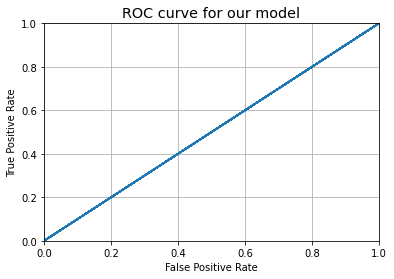

In [ ]:
from pyparsing.core import trace_parse_action
from traitlets.traitlets import Any
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(x_test)
# build the confusion matrix
print("==============================================================")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("===============================================================")
#from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
##########################################################_HERE
tn = cnf_matrix.ravel()
fp=cnf_matrix.ravel()
fn=cnf_matrix.ravel()
tp=cnf_matrix.ravel()
print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(accuracy))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
XGBClassifier: Any(
    n_jobs = 1,
    objective = 'multi:softmax',
    silent=1,
    tree_method='approx'
)
thresholds=np.true_divide(y_test, y_pred)
tpr=np.true_divide(y_test, y_pred)
fpr=np.true_divide(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


Confusion matrix, without normalization
[[9.76e-01 2.35e-02 0.00e+00]
 [1.65e-02 9.83e-01 8.67e-04]
 [0.00e+00 6.49e-03 9.94e-01]]
Normalized confusion matrix
[[9.76e-01 2.35e-02 0.00e+00]
 [1.65e-02 9.83e-01 8.67e-04]
 [0.00e+00 6.49e-03 9.94e-01]]


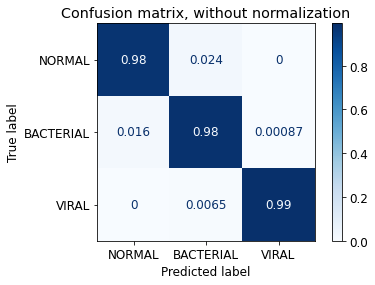

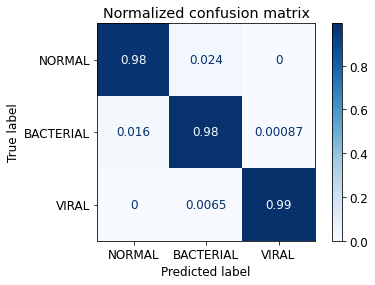

In [ ]:
#plot Confusion Matrix
classes = ['NORMAL','BACTERIAL','VIRAL']

np.set_printoptions(precision=2)

titles_options = [
    ("Confusion matrix, without normalization" , "true"),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_svc,
        x_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    
    print(disp.confusion_matrix)
    
plt.show()